In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import OneHotEncoder
import torch

iris = load_iris()

encoder = OneHotEncoder(sparse=False)
x_train = iris.data
y_train =encoder.fit_transform(iris.target.reshape(-1, 1))
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)
x_train = x_train.float()
y_train = y_train.float()


In [2]:
import torch

data_federation = [[x_train, y_train], [x_train, y_train]]

in_layer = 4
out_layer = 3
optimizer = "SGD"
criterion = "MSELoss"
starting_model = torch.rand(in_layer, out_layer)
epochs = 10000
learn_rate = 0.1

In [3]:
from helper_libs.shared.models.LogisticRegression import LogisticRegression


model = LogisticRegression(in_layer, out_layer)

criterion = torch.nn.MSELoss() 
optimizer = torch.optim.SGD(model.parameters(), lr=learn_rate)

In [4]:
from torch.autograd import Variable

for epoch in range(epochs):

    inputs = Variable(x_train)
    labels = Variable(y_train)

    # Clear gradient buffers because we don't want any gradient from previous epoch to carry forward, dont want to cummulate gradients
    optimizer.zero_grad()

    # get output from the model, given the inputs
    outputs = model(inputs)

    # get loss for the predicted output
    loss = criterion(outputs, labels)

    # get gradients w.r.t to parameters
    loss.backward()

    # update parameters
    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.22754517197608948
epoch 1, loss 0.22329579293727875
epoch 2, loss 0.22019876539707184
epoch 3, loss 0.21779181063175201
epoch 4, loss 0.21579134464263916
epoch 5, loss 0.2140221893787384
epoch 6, loss 0.2123773843050003
epoch 7, loss 0.21079227328300476
epoch 8, loss 0.20922817289829254
epoch 9, loss 0.20766200125217438
epoch 10, loss 0.20607990026474
epoch 11, loss 0.20447392761707306
epoch 12, loss 0.20283985137939453
epoch 13, loss 0.20117613673210144
epoch 14, loss 0.19948363304138184
epoch 15, loss 0.19776535034179688
epoch 16, loss 0.19602662324905396
epoch 17, loss 0.1942751407623291
epoch 18, loss 0.19252096116542816
epoch 19, loss 0.19077633321285248
epoch 20, loss 0.18905511498451233
epoch 21, loss 0.18737217783927917
epoch 22, loss 0.18574202060699463
epoch 23, loss 0.1841776818037033
epoch 24, loss 0.18268930912017822
epoch 25, loss 0.1812833994626999
epoch 26, loss 0.17996226251125336
epoch 27, loss 0.17872419953346252
epoch 28, loss 0.1775641143321991
epoc

In [5]:
predicted = model(x_train)

In [6]:
predictions = []
for prediction in predicted:
        predictions.append(prediction.argmax())
predictions

labels = []
for y in y_train:
        labels.append(y.argmax())

column_a = []
for x in x_train:
    column_a.append(x[0])
    

/tmp/ipykernel_3969/1793160935.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "go" (-> color='g'). The keyword argument will take precedence.
  plt.plot(column_a, predictions, 'go', color='red', label='Predictions]', alpha=0.3)


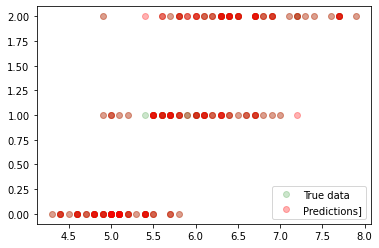

In [7]:
import matplotlib.pyplot as plt

plt.plot(column_a, labels, 'go', label='True data', alpha=0.2)
plt.legend(loc='best')
plt.plot(column_a, predictions, 'go', color='red', label='Predictions]', alpha=0.3)
plt.legend(loc='best')
plt.show()